In [139]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**VARIABLES**

*  **age: age in years**

*   **sex: sex** (1 = male; 0 = female)

*   **cp: chest pain type** -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 10

*  **trestbps: resting blood pressure** (in mm Hg on admission to the hospital)

*   **chol: serum cholestoral** in mg/dl

*  **fbs: (fasting blood sugar > 120 mg/dl)** (1 = true; 0 = false)

*   **restecg: resting electrocardiographic results** -- Value 0: normal -- Value 1: having ST-T wave abnormality 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

*   ** thalach: maximum heart rate achieved**
*  **exang: exercise induced angina **(1 = yes; 0 = no)

* ** oldpeak = ST depression induced by exercise relative to rest**


*   **slope: the slope of the peak exercise ST segment** -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping


*   **ca: number of major vessels** (0-3) colored by flourosopy


*   ** thal: thalassemia**-- 3 = normal; 6 = fixed defect; 7 = reversable defect

*    **target:** 0(no presence) 1(presence)

#  **Basic Insights**

In [140]:
heart_data = pd.read_csv('heart_dis_pred.csv')

In [141]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
print('Number of Rows:', heart_data.shape[0])
print('Number of Features:', heart_data.shape[1])

Number of Rows: 303
Number of Features: 14


In [143]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* No Null Values found

-------------

# **EXPLORATORY DATA ANALYSIS**

In [144]:
heart_data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate'
                    , 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']

In [145]:
data_sample = heart_data.copy()

In [147]:
data_sample['Sex'][data_sample['Sex']==1]='Male' 
data_sample['Sex'][data_sample['Sex']==0]='Female'

data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 2] = 'atypical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 3] = 'non-anginal pain' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 4] = 'asymptomatic'

data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 0] = 'lower than 120mg/ml' 
data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 1] = 'greater than 120mg/ml'

data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 0] = 'normal' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 1] = 'ST-T wave abnormality' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 2] = 'left ventricular hypertrophy'

data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 0] = 'no' 
data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 1] = 'yes'

data_sample['Slope'][data_sample['Slope'] == 1] = 'upsloping' 
data_sample['Slope'][data_sample['Slope'] == 2] = 'flat' 
data_sample['Slope'][data_sample['Slope'] == 3] = 'downsloping'

data_sample['thalassemia'][data_sample['thalassemia'] == 1] = 'normal' 
data_sample['thalassemia'][data_sample['thalassemia'] == 2] = 'fixed defect' 
data_sample['thalassemia'][data_sample['thalassemia'] == 3] = 'reversable defect'

In [148]:
heart_data.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 **1. Distribution Of target**

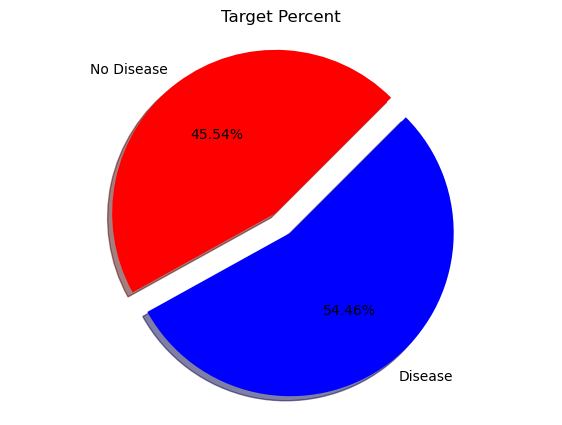

In [149]:
def plot1():
  plt.figure(figsize=(7, 5))
  target_count = [len(data_sample[data_sample['target'] == 0]),len(data_sample[data_sample['target'] == 1])]
  labels = ['No Disease', 'Disease']
  colors = ['red', 'blue']
  explode = (0.05, 0.1)
  plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
  plt.title('Target Percent')
  plt.axis('equal')
  plt.show()  
plot1()

**2. Distribution of Sex**

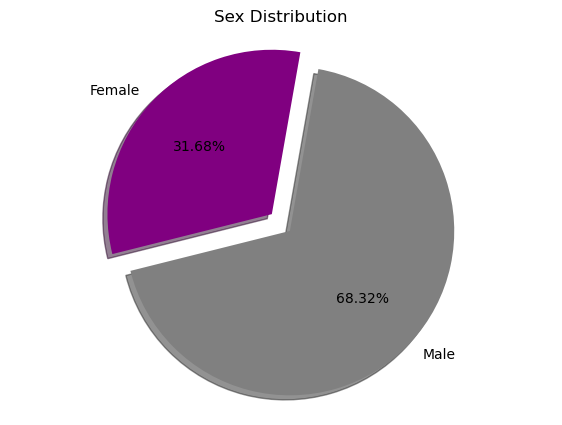

In [150]:
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data_sample[data_sample['Sex'] == 'Female']),len(data_sample[data_sample['Sex'] == 'Male'])]
  labels = ['Female', 'Male']
  colors = ['purple', 'grey']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

Male Population is higher and their likelyhood to test posive is high as well.

**Distribution of age**

C:\Users\sonal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


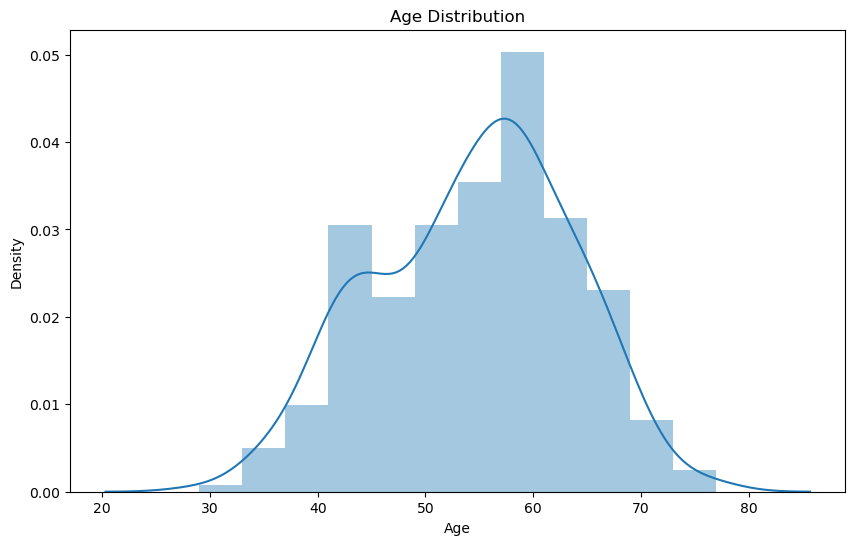

In [152]:
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data_sample['Age'])
    plt.title('Age Distribution')
    plt.show()
plot3()   

Age is normally distributed.

**4. Sex Type and Age vs Heart Disease**

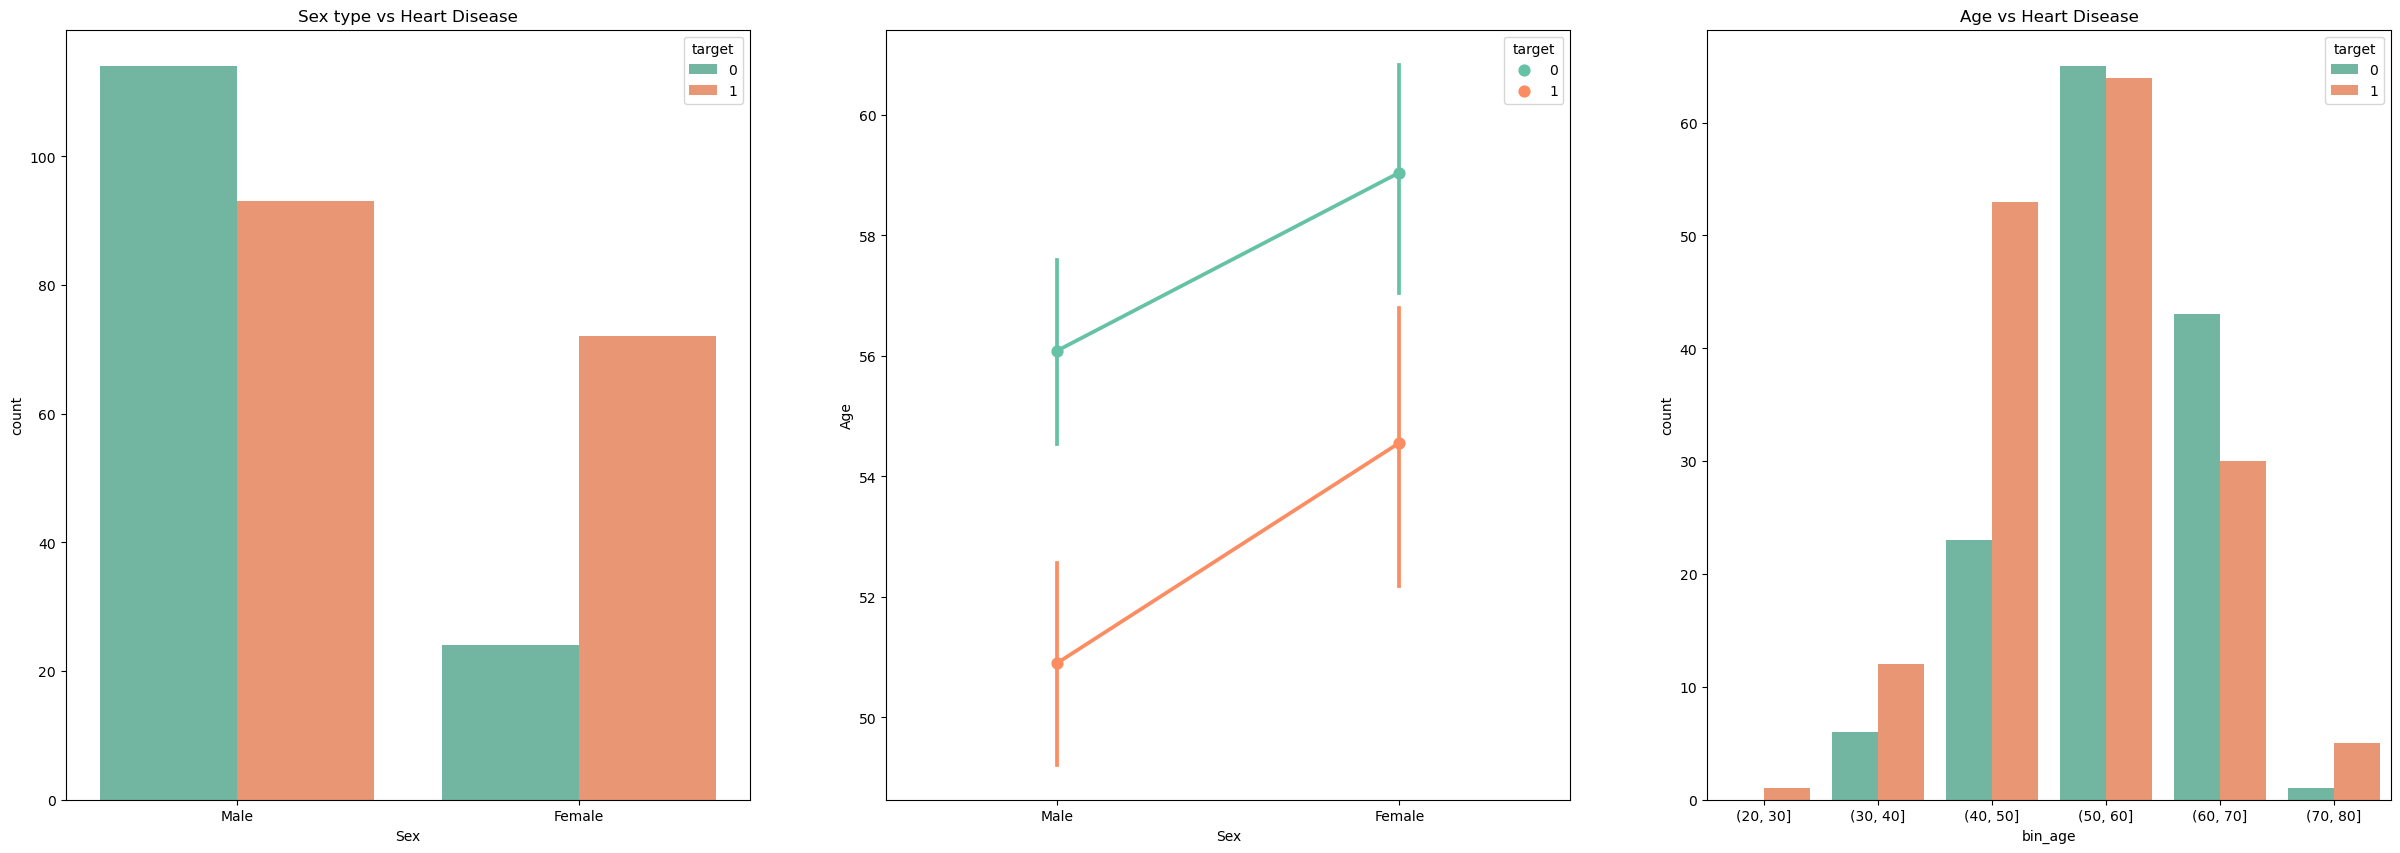

In [153]:
def plot4():
 
    plt.figure(figsize=(30,10))
  
    age_bins = [20,30,40,50,60,70,80]
    data_sample['bin_age'] = pd.cut(data_sample['Age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Sex', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='Sex', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs Heart Disease')
    
plot4()


**from the graph Males are more likely to get heart disease**

**Average age for females with heart disease is 54 and male with heart disease is 50**

**heart disease affects people with of ages around 50 years**


##Factors related to heart disease

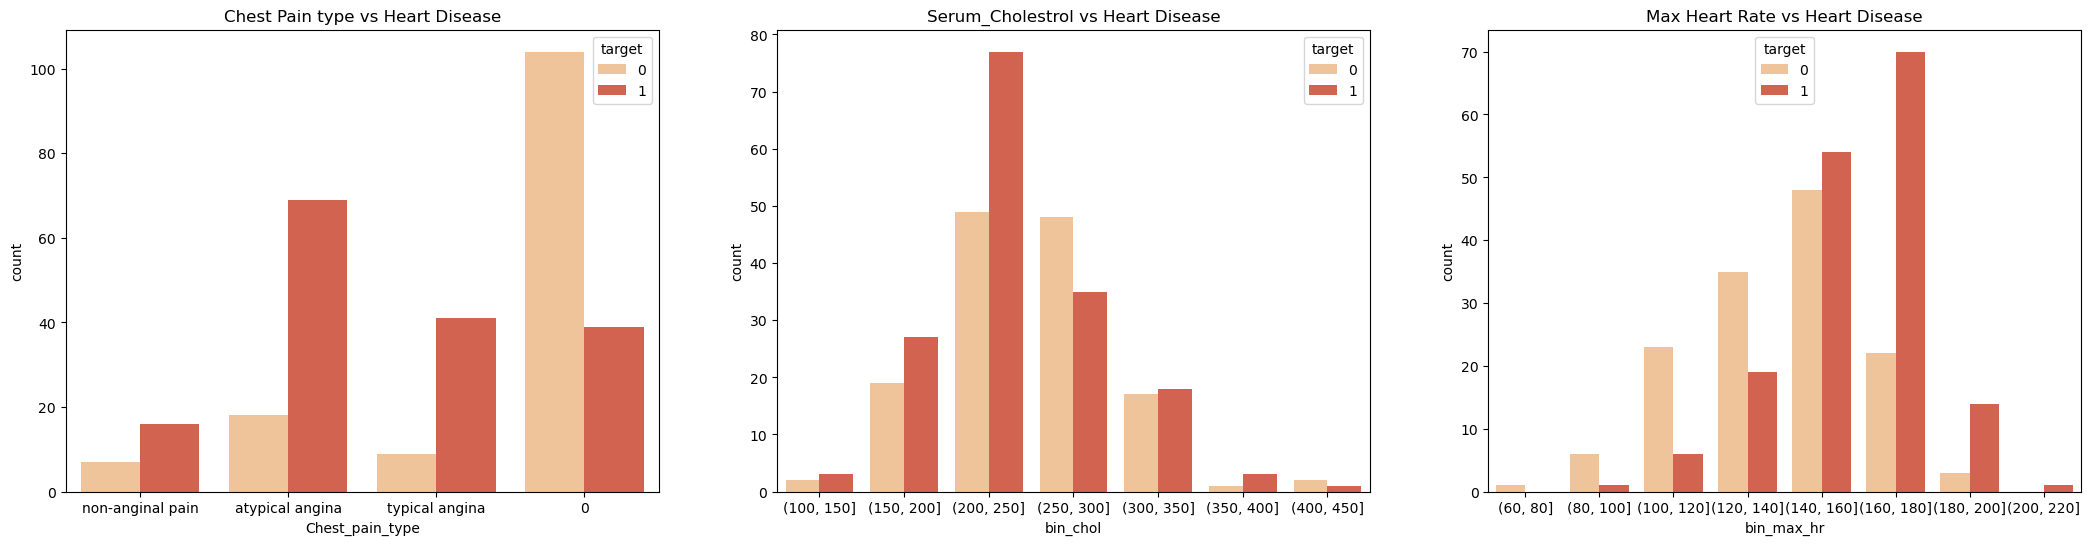

In [154]:
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data_sample['bin_chol'] = pd.cut(data_sample['Serum_cholestoral(mg/dl)'], bins=chol_bins)
    data_sample['bin_max_hr'] = pd.cut(data_sample['Max_heart_rate'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Chest_pain_type', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Chest Pain type vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Serum_Cholestrol vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Max Heart Rate vs Heart Disease')
    
plot5()

**Insights:**

**Atypical angina chest pain resulted in more heart disease**

**Cholestrol Range of 200 - 300 have resulted in heart disease**

**Maximum heart rate between 140 to 180 have resulted in heart disease**

**6. Atrributes asscicated with showing heart disease - 2**

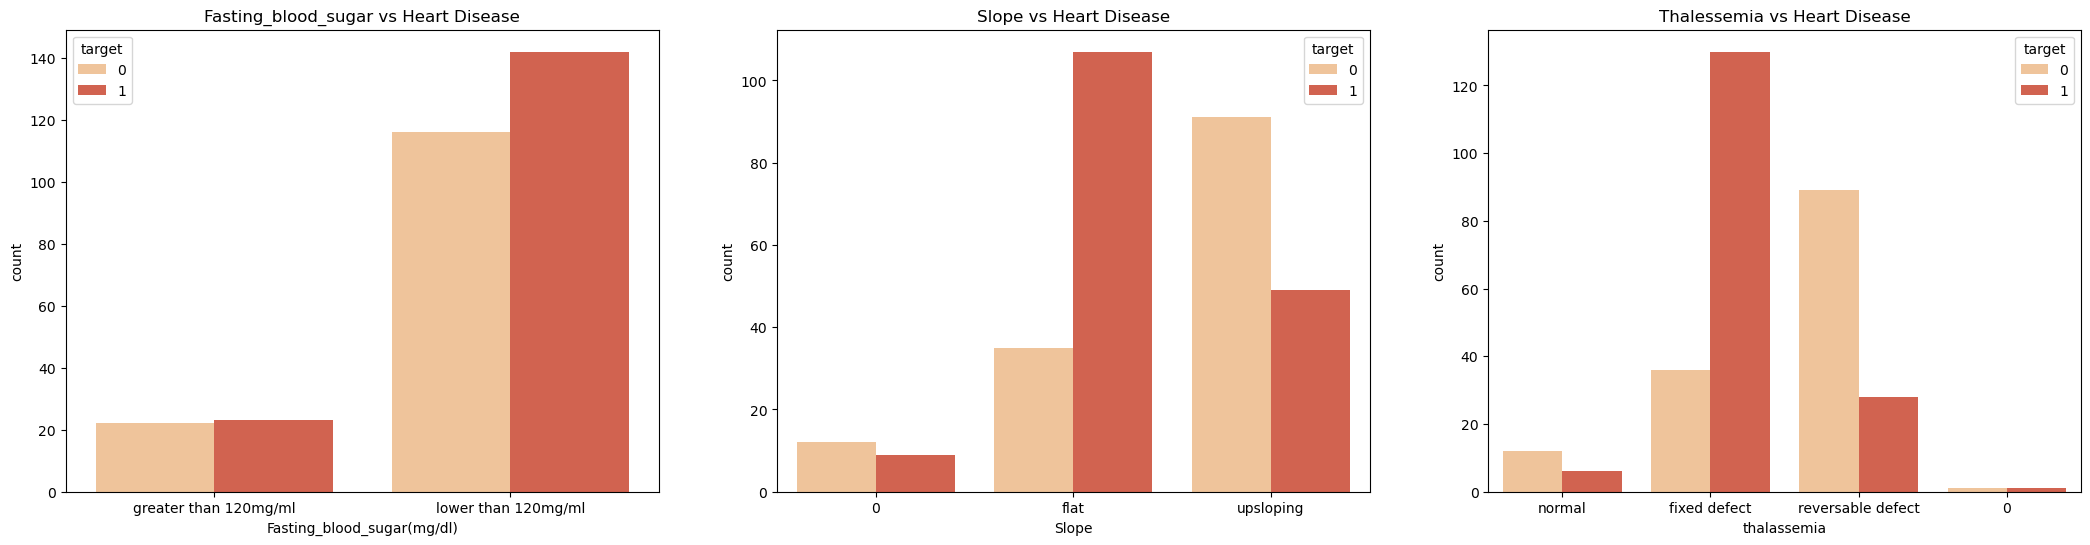

In [155]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='Slope', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Slope vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thalassemia', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Thalessemia vs Heart Disease')
plot6()



**Blood Sugar level lower than 120mg/ml has resulted in more heart disease**

**Slope type of flat have resulted in heart disease**

**Thalassemai type of fixed defect have resulted in heart disease**

**7. Atrributes asscicated with showing heart disease - 3**

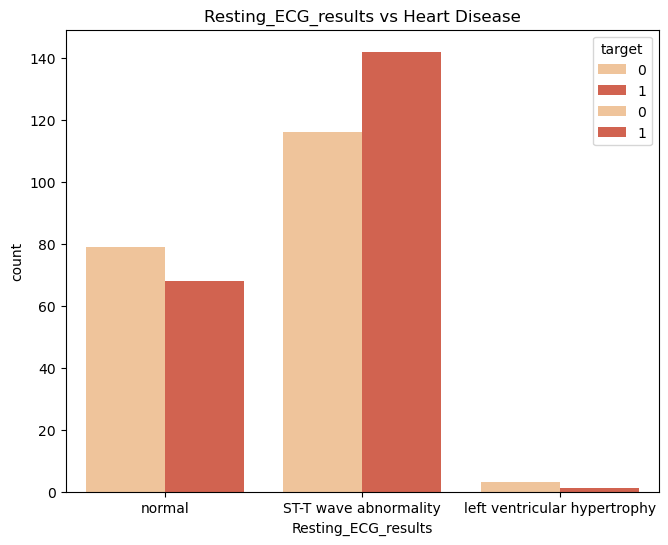

In [156]:
def plot7():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
         
  
    p1 = sns.countplot(x='Resting_ECG_results', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Resting_ECG_results vs Heart Disease')
    
    
plot7()

**Ages vs heart disease **

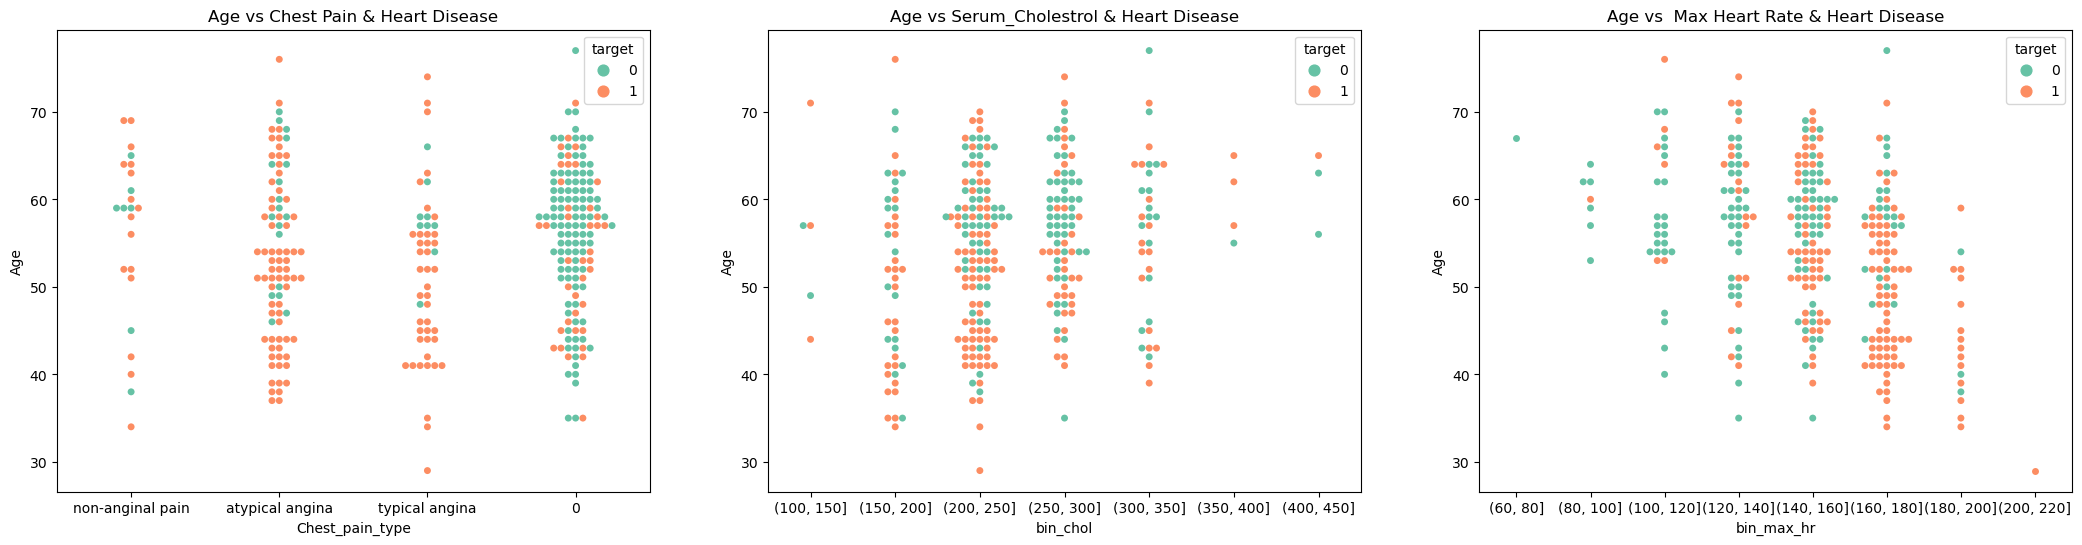

In [157]:
def plot8():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Chest_pain_type', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Chest Pain & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='bin_chol', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Serum_Cholestrol & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='bin_max_hr',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Max Heart Rate & Heart Disease')
plot8()



**Important note here - Chest pain type makes an important factor for having heart disesese because most of the cases with target 1 have chest                      pain**

**Cholestrol level 200-250 is more among the age range 40 - 60**

**Max heart rate between 160-180 that have led to heart disease are more likely to occur for age group of 40-50**

**Ages vs heart disease**

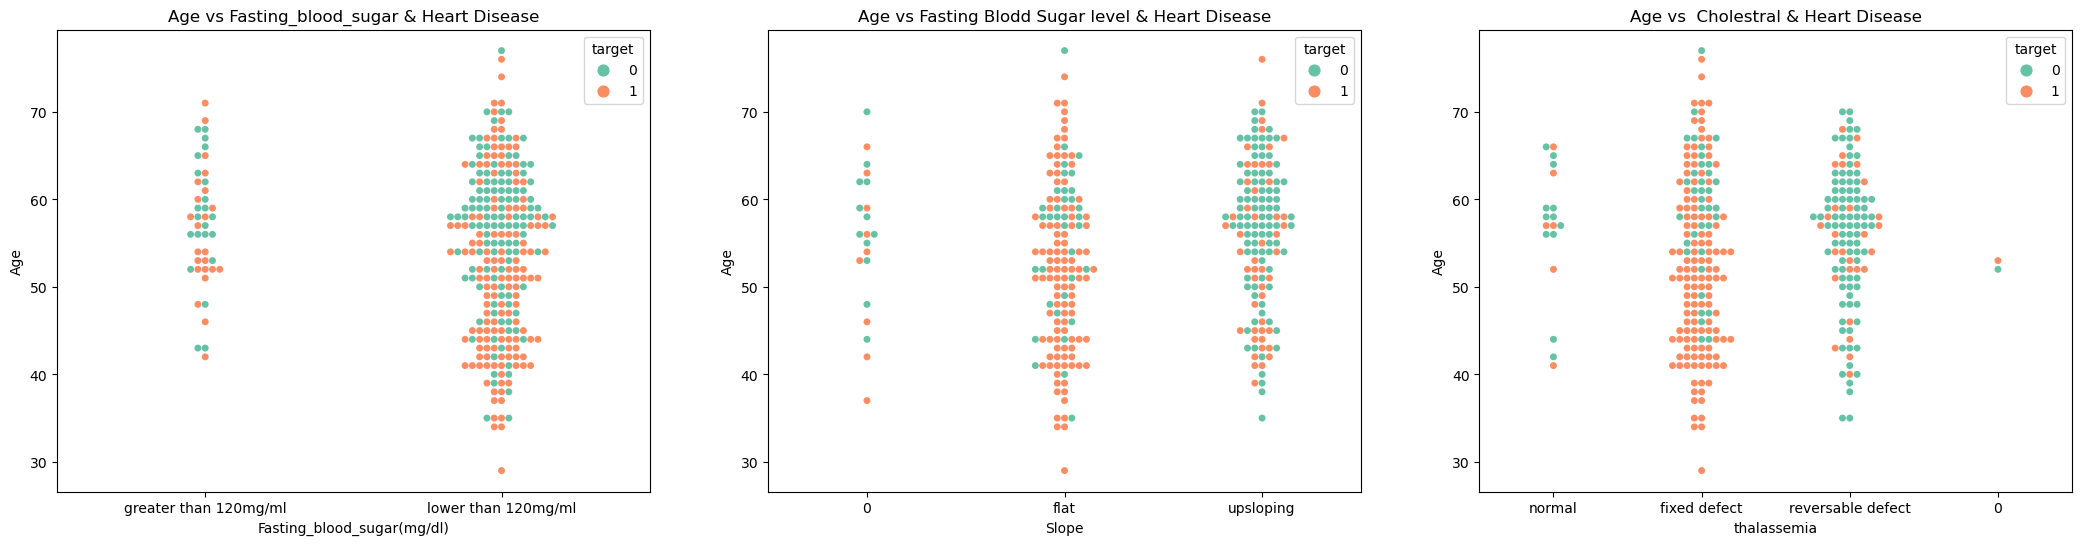

In [158]:
def plot9():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Fasting_blood_sugar(mg/dl)', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Fasting_blood_sugar & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='Slope', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Fasting Blodd Sugar level & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='thalassemia',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Cholestral & Heart Disease')
plot9()



**Most of our observation shows Blood sugar level lower than 120mg/ml**

**Distribution of slope type with ages**

**Thalassemia type of fixed defect that have led to heart disease are more likely to occur for age group of 40-55**

**Ages vs heart disease**

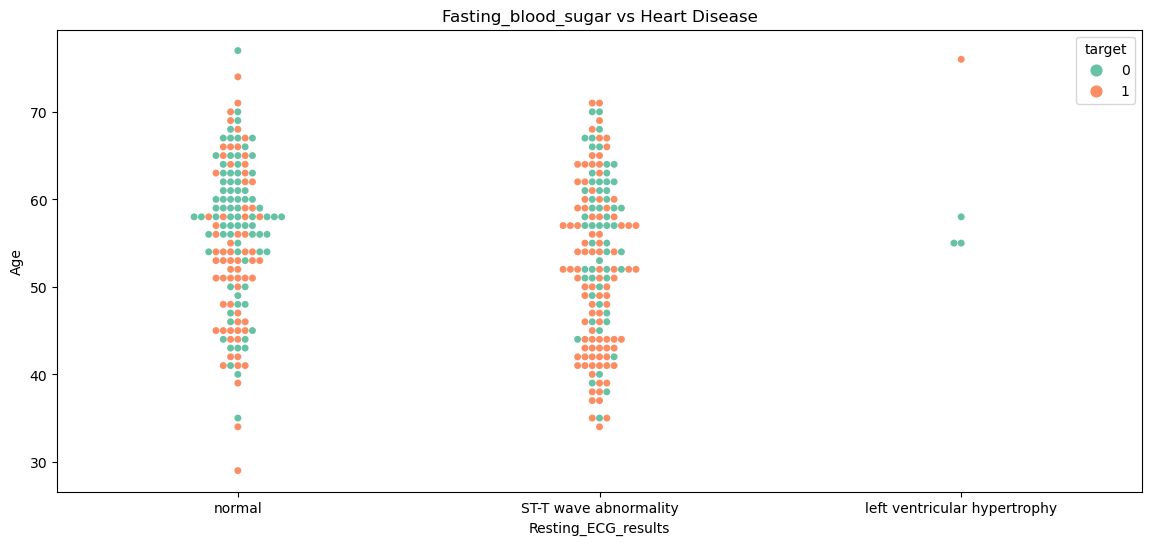

In [159]:
def plot10():
    plt.figure(figsize=(14,6))
    p1 = sns.swarmplot(x='Resting_ECG_results', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')           
plot10()

-------------------


#Prediction using  machine learning

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [161]:
X = heart_data.loc[:, heart_data.columns!='target']
X.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [162]:
y = heart_data.loc[:, heart_data.columns=='target']
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25, stratify=y )

In [164]:
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


In [165]:
print(y_train.shape)
print(y_test.shape)

(227, 1)
(76, 1)


**Model 1 : Decision Tree **

In [166]:
def tree1():
  
   return DecisionTreeClassifier(random_state=1)
  
Model1 = tree1()
Model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [167]:
prediction_model1 = Model1.predict(X_test)
print('Decision Tree accuracy score', accuracy_score(y_test, prediction_model1))

Decision Tree accuracy score 0.75


-----------------

**Model 2: Decision tree with Gridsearchcv**

In [ ]:
def tree2():
  
  dtree = DecisionTreeClassifier(random_state=1)
  params = {'splitter':['best'],  'max_depth': range(2,60),
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
            'max_features':['sqrt','log2',None]}
  
  return GridSearchCV(dtree, params, cv=10)

Model2 = tree2()
Model2.fit(X_train,y_train)

In [ ]:
prediction_model2 = Model2.predict(X_test)
print('Decision Tree with gridsearchcv accuracy score',accuracy_score(y_test,prediction_model2))

-----------------

**Model 3: Random Forest**

In [ ]:
def tree3():
  
  return RandomForestClassifier(random_state=1)
  
Model3 = tree3()
Model3.fit(X_train,y_train)  

In [ ]:
prediction_model3 = Model3.predict(X_test)
print('Random forest accuracy score', accuracy_score(y_test,prediction_model3))

-----------------

**Model 4: Random Forest with RandomizedSearchCV**

In [ ]:
def tree4():
  
  rf = RandomForestClassifier(random_state=1)
  params = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
  n_iter = 50

  return RandomizedSearchCV(rf, param_distributions = params, n_iter = n_iter, n_jobs=-1)
  
Model4 = tree4()
Model4.fit(X_train,y_train)

In [ ]:
prediction_model4 = Model4.predict(X_test)
print('Random Forest with RandomizedSearchCV accuracy score:', accuracy_score(y_test,prediction_model4))

In [ ]:
print('Best Prameters:', Model4.best_params_)
print('Best Score:', Model4.best_score_)

In [ ]:
modle4_matrix = pd.DataFrame()
model4_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model4))
model4_matrix.index = ['Actual No Disease','Actual Disease']
model4_matrix.columns = ['Predicted No Disease','Predicted Disease']
model4_matrix

**Excellent Random Forest with RandomizedSearchCV has given good accuracy.**

----------------------

**Normalizing the values for certain models**

In [ ]:
scaler = StandardScaler().fit(X)
X1 = scaler.transform(X)

In [ ]:
X1 = pd.DataFrame(X1)
X1.head()

In [ ]:
X1_train,X1_test,y_train,y_test = train_test_split(X1, y, random_state=1, test_size=0.25, stratify=y)

In [ ]:
 accuracy_list = []
def knn1():
    for i in range(1,25):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X1_train,y_train)
        pred = model.predict(X1_test)
        accuracy_list.append(accuracy_score(y_test,pred))
       
    print("Max accuracy and its k value is:", max([(v,i+1) for i, v in enumerate(accuracy_list)])) 

knn1()

Good We have found a K value with best accuracy so far

In [ ]:
def k_plot():
  plt.figure(figsize=(15,6))
  plt.plot(range(1,25), accuracy_list, marker='o', markerfacecolor='brown', markersize='10')
  plt.xlabel('K- values')
  plt.ylabel('Accuracy of model')
  plt.show()
k_plot()   

In [ ]:
Model5 = KNeighborsClassifier(n_neighbors = 14)
Model5.fit(X1_train, y_train)

In [ ]:
prediction_model5 = Model5.predict(X1_test)
print('KNN accuracy score:', accuracy_score(y_test,prediction_model5))

In [ ]:
modle5_matrix = pd.DataFrame()
model5_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model5))
model5_matrix.index = ['Actual No Disease','Actual Disease']
model5_matrix.columns = ['Predicted No Disease','Predicted Disease']
model5_matrix

------

**Knn with RandomizedSearchCV**

In [ ]:
def knn2():
  
  knn = KNeighborsClassifier()
  params = {'n_neighbors':range(14,20),
          'algorithm':['auto','ball_tree'],
          'leaf_size':2**np.arange(10),
          'metric':['euclidean','manhattan','minkowski','chebyshev']}
  n_iter_search = 25

  return RandomizedSearchCV(knn, random_state=0, param_distributions = params, n_iter = n_iter_search, n_jobs=-1)
  
Model6 = knn2()
Model6.fit(X1_train,y_train)

In [ ]:
prediction_model6 = Model6.predict(X1_test)
print('KNN with RandomizedSearchCV accuracy score:', accuracy_score(y_test,prediction_model6))

In [ ]:
modle6_matrix = pd.DataFrame()
model6_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model6))
model6_matrix.index = ['Actual No Disease','Actual Disease']
model6_matrix.columns = ['Predicted No Disease','Predicted Disease']
model6_matrix

-----

**SVC**

In [ ]:
def svc():
  
  return  SVC(kernel='linear')

Model7 = SVC()
Model7.fit(X1_train, y_train)

In [ ]:
prediction_model7 = Model7.predict(X1_test)
print('SVC accuracy score:', accuracy_score(y_test,prediction_model7))

In [ ]:
modle7_matrix = pd.DataFrame()
model7_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model7))
model7_matrix.index = ['Actual No Disease','Actual Disease']
model7_matrix.columns = ['Predicted No Disease','Predicted Disease']
model7_matrix

-----------------

**Model 8: Naive_bayes**

In [ ]:
def naive():
      return GaussianNB()
Model8 = GaussianNB()
Model8.fit(X_train,y_train)

In [ ]:
prediction_model8 = Model8.predict(X_test)
print('Naive Bayes accuracy score:', accuracy_score(y_test,prediction_model8))

----------

**Model 9: Logistic Regression**

In [ ]:
def logreg():
      return LogisticRegression()
Model9 = logreg()
Model9.fit(X_train,y_train)

In [ ]:
prediction_model9 = Model9.predict(X_test)
print('Logistic Regression accuracy score:', accuracy_score(y_test,prediction_model9))

**Model 10: Logistic Regression with Gridsearchcv**

In [ ]:
def logreg2():
  params = {'penalty': ['l1','l2'], 'C': np.logspace(0,4,10)}
  logr = LogisticRegression()
  model = GridSearchCV(logr, params, cv=10, verbose=0)
  return model
Model10 = logreg2()
Model10.fit(X_train,y_train)  

In [ ]:
prediction_model10 = Model10.predict(X_test)
print('Logistic Regression 2 accuracy score:', accuracy_score(y_test,prediction_model10))

In [ ]:
print('Best Penalty:', Model10.best_estimator_.get_params()['penalty'])
print('Best C:', Model10.best_estimator_.get_params()['C'])

In [ ]:
modle10_matrix = pd.DataFrame()
model10_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model10))
model10_matrix.index = ['Actual No Disease','Actual Disease']
model10_matrix.columns = ['Predicted No Disease','Predicted Disease']
model10_matrix

-----------------

In [ ]:
def accuracy():
  dtree = accuracy_score(y_test,prediction_model2)
  rf = accuracy_score(y_test,prediction_model4)
  knn = accuracy_score(y_test,prediction_model5)
  svc = accuracy_score(y_test,prediction_model7)
  nb = accuracy_score(y_test,prediction_model8)
  log = accuracy_score(y_test,prediction_model10)
  
  methods = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression']
  accuracy = [dtree*100, rf*100, knn*100, svc*100, nb*100, log*100]
  
  plt.figure(figsize=(14,5))
  sns.barplot(x=methods,y=accuracy)
  plt.xlabel('Models')
  plt.ylabel('Accuracy %')
  plt.title('Models and Accuracy')
  plt.show()
  print('Respective accuracy:', accuracy)
  
accuracy()

In [ ]:
def pre_rec():
  
  print('KNN')
  print('precision_score', metrics.precision_score(y_test, prediction_model5))
  print('Recall_score', metrics.recall_score(y_test, prediction_model5))
  print('----------------------------------------------------------------------')
  
  print('Random Forest')
  print('precision_score', metrics.precision_score(y_test, prediction_model3))
  print('Recall_score', metrics.recall_score(y_test, prediction_model3))
  print('----------------------------------------------------------------------')
  
  print('Logistic regression')
  print('precision_score', metrics.precision_score(y_test, prediction_model10))
  print('Recall_score', metrics.recall_score(y_test, prediction_model10))
  print('----------------------------------------------------------------------')
  
  print('SVC Bayes')
  print('precision_score', metrics.precision_score(y_test, prediction_model7))
  print('Recall_score', metrics.recall_score(y_test, prediction_model7))
  print('----------------------------------------------------------------------')
  
pre_rec()

In [ ]:
def con_matrix():
  
  plt.figure(figsize=(12,12))

  plt.subplots_adjust(wspace = 0.5, hspace=0.2)

  plt.subplot(2,2,1)
  plt.title('KNN Confusion Matrix')
  sns.heatmap(model5_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

  plt.subplot(2,2,2)
  plt.title('Random Forest Confusion Matrix')
  sns.heatmap(model4_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

  plt.subplot(2,2,3)
  plt.title('Logistic regression Confusion Matrix')
  sns.heatmap(model10_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
            
  plt.subplot(2,2,4)
  plt.title('SVC Confusion Matrix')
  sns.heatmap(model7_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
            
  plt.show()
            
con_matrix()            

In [ ]:
def metric():
  probs1 = Model5.predict_proba(X1_test)
  preds1 = probs1[:,1]
  fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
  roc_auc1 = metrics.auc(fpr1,tpr1)
  
  probs2 = Model4.predict_proba(X_test)
  preds2 = probs2[:,1]
  fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
  roc_auc2 = metrics.auc(fpr2,tpr2)
  
  probs3 = Model10.predict_proba(X_test)
  preds3 = probs3[:,1]
  fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
  roc_auc3 = metrics.auc(fpr3,tpr3)
  
  
  plt.figure(figsize=(14,8))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr1, tpr1, label = 'AUC_KNN = %0.2f' % roc_auc1)
  plt.plot(fpr2, tpr2, label = 'AUC_Random_Forest = %0.2f' % roc_auc2)
  plt.plot(fpr3, tpr3, label = 'AUC_Logistic = %0.2f' % roc_auc3)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print('0.90 - 1.00 = excellent')
  print('0.80 - 0.90 = good')
  print('0.70 - 0.80 = fair')
  print('0.60 - 0.70 = poor')
  print('0.50 - 0.60 = fail')
   
metric()